### The purpose of this script is to reduce the original data from the EuroStat portal to the metrics we are investigating.

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import
df = pd.read_csv('./Eurostat PopxAge series.csv')

In [3]:
df.head()

,TIME,GEO,INDIC_DE,Value
0,1950,European Union (current composition),Median age of population,NaN
1,1950,European Union (current composition),Proportion of population aged 0-4 years,NaN
2,1950,European Union (current composition),Proportion of population aged 0-14 years,NaN
3,1950,European Union (current composition),Proportion of population aged 0-19 years,NaN
4,1950,European Union (current composition),Proportion of population aged 5-9 years,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171360 entries, 0 to 171359
Data columns (total 4 columns):
TIME        171360 non-null int64
GEO         171360 non-null object
INDIC_DE    171360 non-null object
Value       96986 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.2+ MB


In [5]:
#choose desired metrics
metrics = ['Proportion of population aged 0-19 years','Proportion of population aged 20-39 years','Proportion of population aged 40-59 years', 'Proportion of population aged 60-79 years' , 'Proportion of population aged 80 years and more']

In [6]:
#select subset of those metrics and rename for convience
df = df[df['INDIC_DE'].isin(metrics)]
df.replace('Proportion of population aged', '% of pop', inplace = True, regex = True)
df.replace('80 years and more', '80+ years', inplace = True, regex = True)

In [7]:
#Unstack to have TIME as one axis, select UK and set TIME as the index
df = df.set_index(list(df.columns[:3]))
df = df.unstack('TIME')
df.columns = df.columns.droplevel()
df=df.T['United Kingdom']

In [8]:
df.head()

INDIC_DE,% of pop 0-19 years,% of pop 20-39 years,% of pop 40-59 years,% of pop 60-79 years,% of pop 80+ years
TIME,,,,,
1950,NaN,NaN,NaN,NaN,1.5
1951,NaN,NaN,NaN,NaN,NaN
1952,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN
1954,29.0,27.8,27.2,14.6,1.8


In [9]:
#check to see if proportions sum to 100.
df.sum(axis=1)

TIME
1950      1.5
1951      0.0
1952      0.0
1953      0.0
1954    100.4
1955    100.0
1956     99.7
1957    100.2
1958    100.2
1959     99.7
1960     99.7
1961     99.9
1962    100.5
1963    100.1
1964    100.1
1965    100.0
1966    100.0
1967    100.0
1968    100.0
1969    100.0
1970    100.0
1971    100.0
1972    100.1
1973    100.1
1974    100.1
1975    100.0
1976    100.0
1977    100.0
1978     99.8
1979    100.0
        ...  
1988    100.0
1989    100.0
1990    100.0
1991    100.0
1992    100.0
1993     99.9
1994    100.0
1995    100.1
1996    100.0
1997    100.0
1998    100.0
1999    100.0
2000    100.0
2001    100.0
2002    100.0
2003    100.0
2004    100.0
2005     99.9
2006    100.0
2007    100.0
2008     99.9
2009    100.0
2010     99.9
2011    100.1
2012    100.0
2013    100.0
2014    100.0
2015    100.0
2016    100.0
2017    100.0
Length: 68, dtype: float64

In [10]:
#Due to rounding from the source the proportions do not sum to 100. Let's make that the case
#We also see that we cannot use data pre 1954 so we shall cut the prior years
df = df.loc[1954:]
df = 100*(df.T/df.T.sum()).T

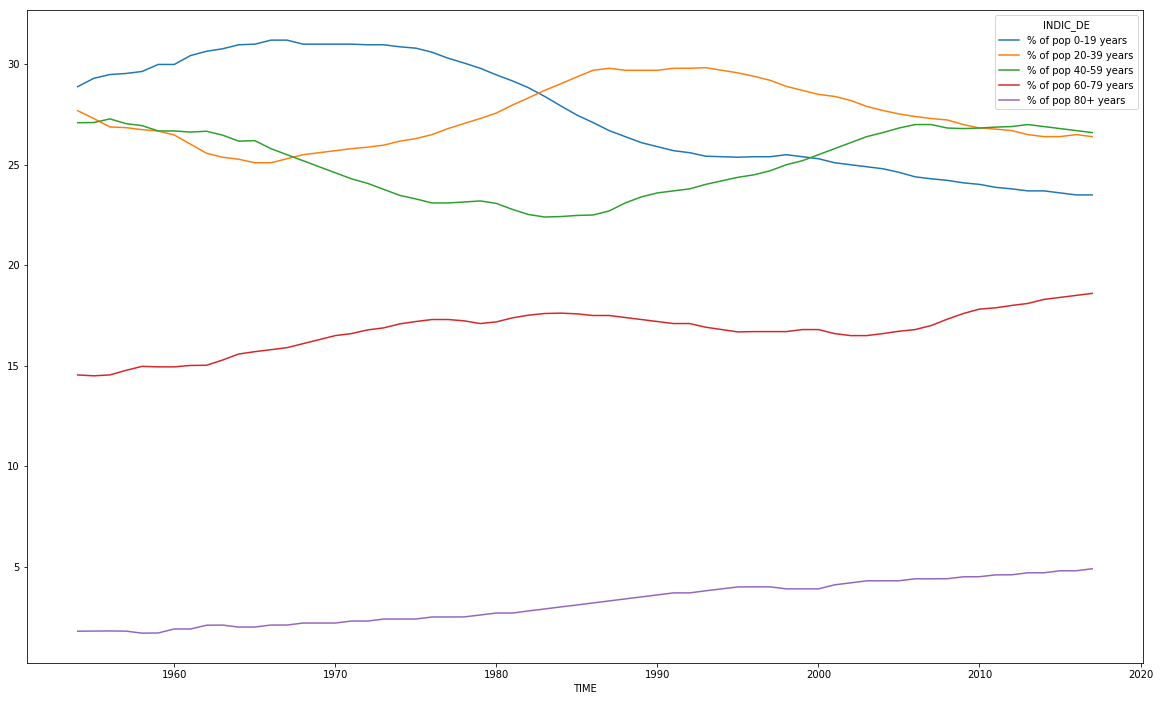

In [11]:
#Visaulise final table
df.plot(figsize = (20,12))

In [12]:
#Export data to csv
df.to_csv('./UK Pop X Age.csv')